In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv(r"C:\Users\Anil\OneDrive\Desktop\laptop_price.csv",encoding = 'Latin-1')

In [23]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [24]:
df.shape

(1303, 13)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [26]:
##check if any rows are duplicate
df.duplicated().sum()

0

In [27]:
#check missing values
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [28]:
df = df.drop('laptop_ID',axis=1)

In [29]:
df['Ram']=df['Ram'].str.strip('GB')
df['Weight']=df['Weight'].str.strip('kg')

In [30]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [31]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [32]:
#convert price from euros to rupees. (1 euro = 85.13 rupees as per 4/12/2021)
df['Price_rupees'] = df['Price_euros']*85.13

In [33]:
df = df.drop('Price_euros',axis=1)

## EDA + Feature Engineering

### Price

c:\anil\hrithik\programming\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_rupees', ylabel='Density'>

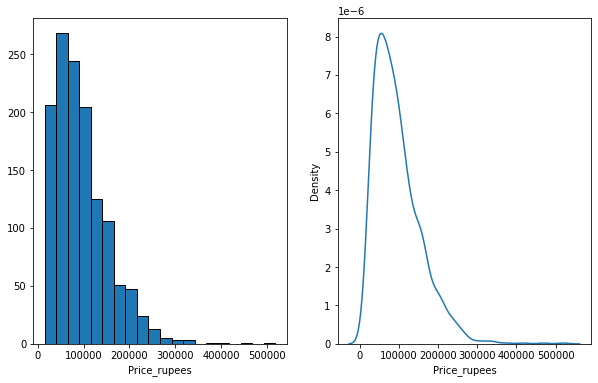

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(df['Price_rupees'],bins=20,edgecolor='black')
plt.xlabel('Price_rupees')
plt.subplot(1,2,2)
sns.distplot(df['Price_rupees'],hist=False)

### Company

<AxesSubplot:>

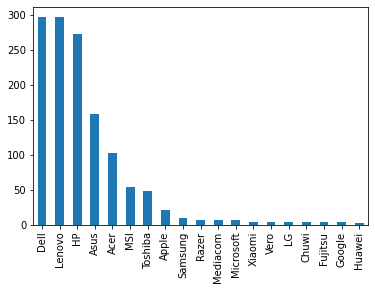

In [35]:
df['Company'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Avg Price')

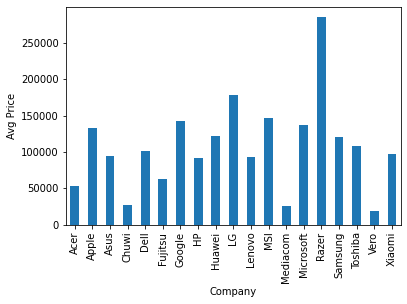

In [36]:
df['Price_rupees'].groupby(df['Company']).mean().plot(kind='bar')
plt.ylabel('Avg Price')

### TypeName

<AxesSubplot:>

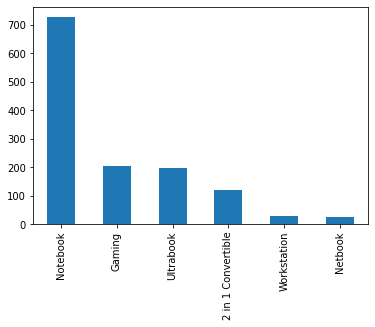

In [37]:
df['TypeName'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Avg Price')

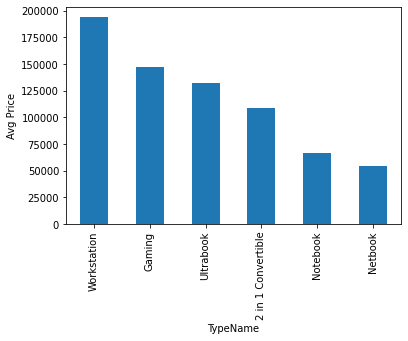

In [38]:
df['Price_rupees'].groupby(df['TypeName']).mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Avg Price')

### Inches

c:\anil\hrithik\programming\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


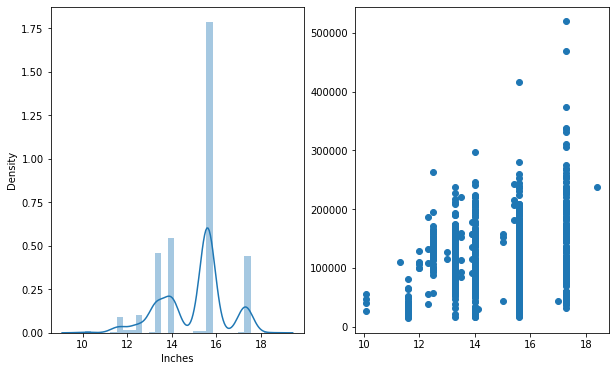

In [39]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['Inches'])
plt.subplot(1,2,2)
plt.scatter(df['Inches'],df['Price_rupees'])

In [40]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rupees
502,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.40,136122.87
676,Asus,Zenbook 3,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,96622.55
21,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,85044.87
186,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,204056.61
202,Acer,Aspire E5-576G,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23,63166.46


### Screen Resolution 

In [41]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440               

In [42]:
for i in range(0,1303):
    df.loc[i,'Touchscreen']=np.where('Touchscreen' in df.loc[i,'ScreenResolution'],1,0)

In [43]:
df['Touchscreen'] = df['Touchscreen'].astype('int32')

<AxesSubplot:>

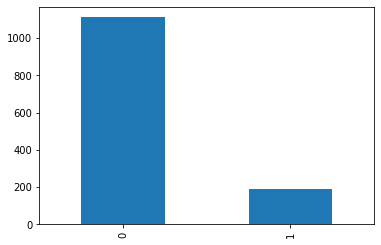

In [44]:
df['Touchscreen'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Avg Price')

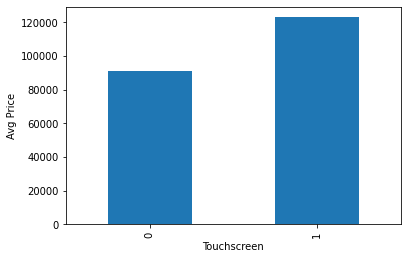

In [45]:
df['Price_rupees'].groupby(df['Touchscreen']).mean().plot(kind='bar')
plt.ylabel('Avg Price')

In [46]:
#extracting X_resolution and Y_resolution from Resolution
for i in range(0,1303):
    df.loc[i,'Resolution']=df.loc[i,'ScreenResolution'].split(" ")[-1]
    df.loc[i,'X_resolution']=df.loc[i,'Resolution'].split("x")[0]
    df.loc[i,'Y_resolution']=df.loc[i,'Resolution'].split("x")[1]

In [47]:
df = df.drop('Resolution',axis = 1)

In [48]:
df['X_resolution']=df['X_resolution'].astype('int32')
df['Y_resolution']=df['Y_resolution'].astype('int32')

In [49]:
df['Ppi'] = ((df['X_resolution']**2+df['Y_resolution']**2)**0.5)/df['Inches']

In [50]:
df.corr()['Price_rupees']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price_rupees    1.000000
Touchscreen     0.191226
X_resolution    0.556529
Y_resolution    0.552809
Ppi             0.473487
Name: Price_rupees, dtype: float64

In [51]:
for i in range(0,1303):
    df.loc[i,'Ips']=np.where('IPS' in df.loc[i,'ScreenResolution'],1,0)

In [52]:
df['Ips'] = df['Ips'].astype('int32')

<AxesSubplot:xlabel='Ips'>

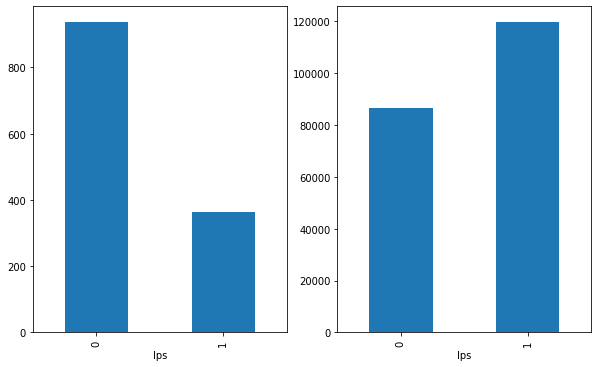

In [53]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df['Ips'].value_counts().plot(kind='bar')
plt.xlabel('Ips')
plt.subplot(1,2,2)
df['Price_rupees'].groupby(df['Ips']).mean().plot(kind='bar')


In [54]:
#Since we have found the ppi, we can drop inches, X_resolution, and Y_resolution.
df = df.drop(['Inches','ScreenResolution','X_resolution','Y_resolution'],axis=1)

### CPU 

In [55]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [56]:
def processor_type(data):
    if data == 'Intel Core i7' or data == 'Intel Core i5' or data == 'Intel Core i3':
        return data
    else:
        if data.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
    

In [57]:
df['Cpu Name'] = df['Cpu Name'].apply(processor_type)

<AxesSubplot:>

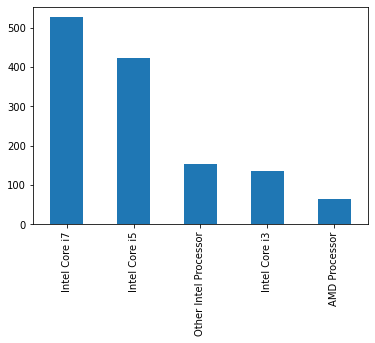

In [58]:
df['Cpu Name'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Avg Price')

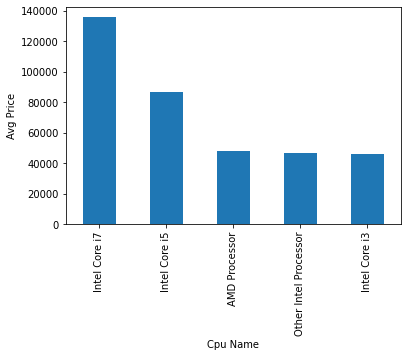

In [59]:
df['Price_rupees'].groupby(df['Cpu Name']).mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Avg Price')

In [60]:
df = df.drop('Cpu',axis = 1)

### Ram 

<AxesSubplot:>

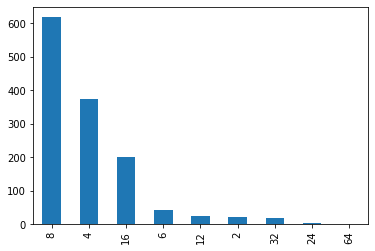

In [61]:
df['Ram'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Avg Price')

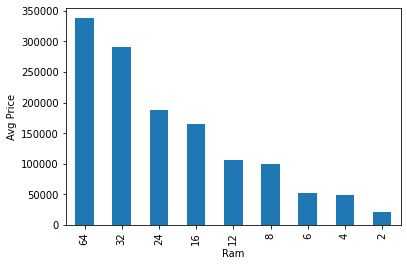

In [62]:
df['Price_rupees'].groupby(df['Ram']).mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Avg Price')
#More the Ram, more is the price. (+ve correlation)

In [63]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_rupees,Touchscreen,Ppi,Ips,Cpu Name
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114047.8097,0,226.983005,1,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76526.7622,0,127.677940,0,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,48949.7500,0,141.211998,0,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216013.1185,0,220.534624,1,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153540.4680,0,226.983005,1,Intel Core i5


### Memory

In [64]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
8GB SSD                            1
5

In [65]:
#splitting the memory into its various types
for i in range(0,1303):
    if ('SSD' in df.loc[i,'Memory']):
        value = df.loc[i,'Memory'].split()
        position = value.index('SSD')
        df.loc[i,'SSD']=df.loc[i,'Memory'].split()[position-1]
    else:
        df.loc[i,'SSD']=0
        
    if ('HDD' in df.loc[i,'Memory']):
        value = df.loc[i,'Memory'].split()
        position = value.index('HDD')
        df.loc[i,'HDD']=df.loc[i,'Memory'].split()[position-1]
    else:
        df.loc[i,'HDD']=0
    
    if ('Flash' in df.loc[i,'Memory']):
        value = df.loc[i,'Memory'].split()
        position = value.index('Flash')
        df.loc[i,'Flash']=df.loc[i,'Memory'].split()[position-1]
    else:
        df.loc[i,'Flash']=0
    
    if ('Hybrid' in df.loc[i,'Memory']):
        value = df.loc[i,'Memory'].split()
        position = value.index('Hybrid')
        df.loc[i,'Hybrid']=df.loc[i,'Memory'].split()[position-1]
    else:
        df.loc[i,'Hybrid']=0
    
    

In [66]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_rupees,Touchscreen,Ppi,Ips,Cpu Name,SSD,HDD,Flash,Hybrid
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114047.8097,0,226.983005,1,Intel Core i5,128GB,0,0,0
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76526.7622,0,127.677940,0,Intel Core i5,0,0,128GB,0
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,48949.7500,0,141.211998,0,Intel Core i5,256GB,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216013.1185,0,220.534624,1,Intel Core i7,512GB,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153540.4680,0,226.983005,1,Intel Core i5,256GB,0,0,0


In [67]:
df['SSD']=df['SSD'].str.strip('GB')
df['HDD']=df['HDD'].str.strip('GB')
df['Flash']=df['Flash'].str.strip('GB')
df['Hybrid']=df['Hybrid'].str.strip('GB')

In [68]:
df.isnull().sum()

Company            0
Product            0
TypeName           0
Ram                0
Memory             0
Gpu                0
OpSys              0
Weight             0
Price_rupees       0
Touchscreen        0
Ppi                0
Ips                0
Cpu Name           0
SSD              460
HDD              727
Flash           1228
Hybrid          1291
dtype: int64

In [69]:
df = df.fillna(value=0)

In [70]:
df['HDD'] = df['HDD'].replace('1T',1000)

In [71]:
df['HDD'] = df['HDD'].replace('1.0T',1000)

In [72]:
df['HDD'] = df['HDD'].replace('2T',2000)

In [73]:
df['SSD'] = df['SSD'].replace('1T',1000)
df['SSD'] = df['SSD'].replace('1.0T',1000)
df['SSD'] = df['SSD'].replace('2T',2000)

In [74]:
df['Flash'] = df['Flash'].replace('1T',1000)
df['Flash'] = df['Flash'].replace('1.0T',1000)
df['Flash'] = df['Flash'].replace('2T',2000)

In [75]:
df['Hybrid'] = df['Hybrid'].replace('1T',1000)
df['Hybrid'] = df['Hybrid'].replace('1.0T',1000)
df['Hybrid'] = df['Hybrid'].replace('2T',2000)

In [76]:
# Took all the types of memory seperately
df = df.drop('Memory', axis=1)

In [77]:
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_rupees,Touchscreen,Ppi,Ips,Cpu Name,SSD,HDD,Flash,Hybrid
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,114047.8097,0,226.983005,1,Intel Core i5,128,0,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,76526.7622,0,127.677940,0,Intel Core i5,0,0,128,0
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,48949.7500,0,141.211998,0,Intel Core i5,256,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,216013.1185,0,220.534624,1,Intel Core i7,512,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,153540.4680,0,226.983005,1,Intel Core i5,256,0,0,0


In [78]:
df['SSD'] = df['SSD'].astype('int32')
df['HDD'] = df['HDD'].astype('int32')
df['Flash'] = df['Flash'].astype('int32')
df['Hybrid'] = df['Hybrid'].astype('int32')

In [79]:
df.corr()['Price_rupees']

Ram             0.743007
Weight          0.210370
Price_rupees    1.000000
Touchscreen     0.191226
Ppi             0.473487
Ips             0.252208
SSD             0.676202
HDD            -0.095672
Flash          -0.040511
Hybrid          0.007989
Name: Price_rupees, dtype: float64

In [80]:
#We see that the correlation b/w Flash/Hybrid and Price is negligible, so we will delete both those columns.
df = df.drop(['Hybrid','Flash'],axis=1)

### GPU 

In [81]:
#Extracting the brand names
for i in range(0,1303):
    df.loc[i,'Gpu Name'] = df.loc[i,'Gpu'].split(" ")[0]

In [82]:
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_rupees,Touchscreen,Ppi,Ips,Cpu Name,SSD,HDD,Gpu Name
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,114047.8097,0,226.983005,1,Intel Core i5,128,0,Intel
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,76526.7622,0,127.677940,0,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,48949.7500,0,141.211998,0,Intel Core i5,256,0,Intel
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,216013.1185,0,220.534624,1,Intel Core i7,512,0,AMD
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,153540.4680,0,226.983005,1,Intel Core i5,256,0,Intel


In [83]:
df['Gpu Name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Name, dtype: int64

In [84]:
df = df.drop(['Gpu'],axis = 1)

In [85]:
#Removing ARM to get 3 categories
df = df[df['Gpu Name']!='ARM']

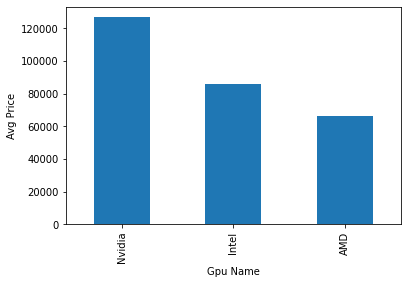

In [86]:
df['Price_rupees'].groupby(df['Gpu Name']).mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Avg Price')
plt.show()

### Operating System

In [87]:
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_rupees,Touchscreen,Ppi,Ips,Cpu Name,SSD,HDD,Gpu Name
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,114047.8097,0,226.983005,1,Intel Core i5,128,0,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,76526.7622,0,127.677940,0,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,No OS,1.86,48949.7500,0,141.211998,0,Intel Core i5,256,0,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,216013.1185,0,220.534624,1,Intel Core i7,512,0,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,153540.4680,0,226.983005,1,Intel Core i5,256,0,Intel


In [88]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

Text(0, 0.5, 'Avg Price')

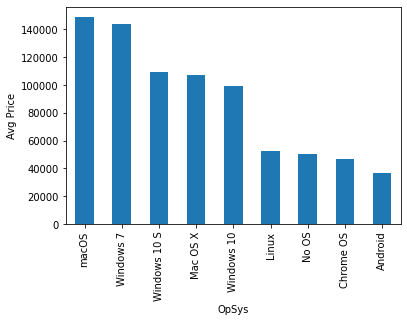

In [89]:
df['Price_rupees'].groupby(df['OpSys']).mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Avg Price')

In [90]:
#We can combine all the categories into 3 major ones: Mac, Windows, and others.
for i in range(0,1191):
    if (df.loc[i,'OpSys']=='Windows 10'):
        df.loc[i,'OpSys Name']=df.loc[i,'OpSys'].split(" ")[0]
    elif (df.loc[i,'OpSys']=='Windows 10 S'):
        df.loc[i,'OpSys Name']=df.loc[i,'OpSys'].split(" ")[0]  
    elif (df.loc[i,'OpSys']=='Windows 7'):
        df.loc[i,'OpSys Name']=df.loc[i,'OpSys'].split(" ")[0]
    elif (df.loc[i,'OpSys']=='Mac OS X'):
        df.loc[i,'OpSys Name']=df.loc[i,'OpSys'].split(" ")[0]
    elif (df.loc[i,'OpSys']=='macOS'):
        df.loc[i,'OpSys Name']='Mac'
    else:
        df.loc[i,'OpSys Name']='Others'

for i in range(1192,1303):
    if (df.loc[i,'OpSys']=='Windows 10'):
        df.loc[i,'OpSys Name']=df.loc[i,'OpSys'].split(" ")[0]
    elif (df.loc[i,'OpSys']=='Windows 10 S'):
        df.loc[i,'OpSys Name']=df.loc[i,'OpSys'].split(" ")[0]  
    elif (df.loc[i,'OpSys']=='Windows 7'):
        df.loc[i,'OpSys Name']=df.loc[i,'OpSys'].split(" ")[0]
    elif (df.loc[i,'OpSys']=='Mac OS X'):
        df.loc[i,'OpSys Name']=df.loc[i,'OpSys'].split(" ")[0]
    elif (df.loc[i,'OpSys']=='macOS'):
        df.loc[i,'OpSys Name']='Mac'
    else:
        df.loc[i,'OpSys Name']='Others'



In [91]:
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_rupees,Touchscreen,Ppi,Ips,Cpu Name,SSD,HDD,Gpu Name,OpSys Name
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,114047.8097,0,226.983005,1,Intel Core i5,128,0,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,76526.7622,0,127.677940,0,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,No OS,1.86,48949.7500,0,141.211998,0,Intel Core i5,256,0,Intel,Others
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,216013.1185,0,220.534624,1,Intel Core i7,512,0,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,153540.4680,0,226.983005,1,Intel Core i5,256,0,Intel,Mac


In [92]:
df = df.drop(['OpSys'], axis = 1)

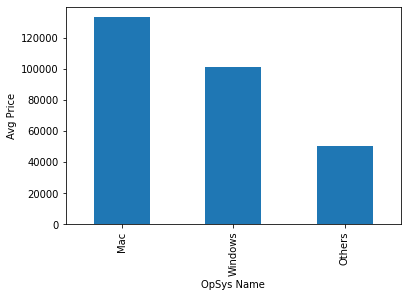

In [93]:
df['Price_rupees'].groupby(df['OpSys Name']).mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Avg Price')
plt.show()

### Weight 

In [94]:
df.head()

,Company,Product,TypeName,Ram,Weight,Price_rupees,Touchscreen,Ppi,Ips,Cpu Name,SSD,HDD,Gpu Name,OpSys Name
0,Apple,MacBook Pro,Ultrabook,8,1.37,114047.8097,0,226.983005,1,Intel Core i5,128,0,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,1.34,76526.7622,0,127.677940,0,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,1.86,48949.7500,0,141.211998,0,Intel Core i5,256,0,Intel,Others
3,Apple,MacBook Pro,Ultrabook,16,1.83,216013.1185,0,220.534624,1,Intel Core i7,512,0,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,1.37,153540.4680,0,226.983005,1,Intel Core i5,256,0,Intel,Mac


c:\anil\hrithik\programming\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


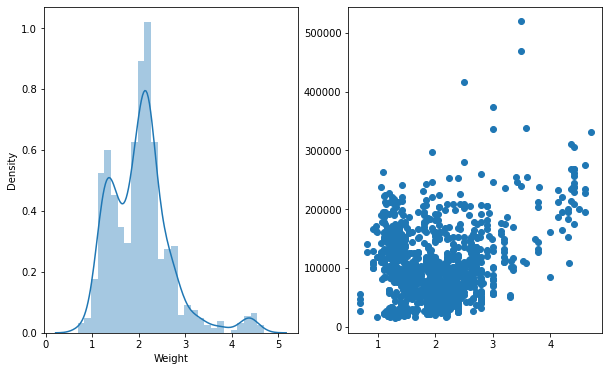

In [95]:
#Weight is bimodal in nature
#Slight linear relationship b/w Weight and Price
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['Weight'])
plt.subplot(1,2,2)
plt.scatter(df['Weight'],df['Price_rupees'])

# Feature Selection 

<AxesSubplot:>

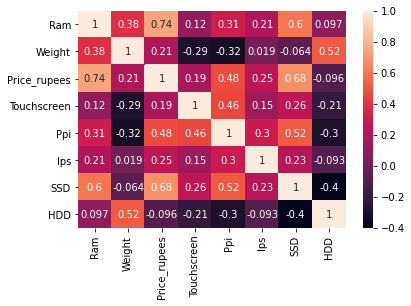

In [96]:
#No strong correlation b/w independent columns
sns.heatmap(df.corr(),annot=True)

# Transformation

c:\anil\hrithik\programming\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\anil\hrithik\programming\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


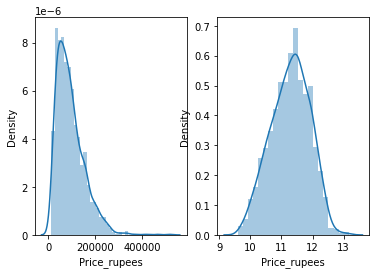

In [97]:
#Comparing Price_rupees and log of Price_rupees. By applying log, Price_rupees becomes a normal distribution.
plt.subplot(1,2,1)
sns.distplot(df['Price_rupees'])
plt.subplot(1,2,2)
sns.distplot(np.log(df['Price_rupees']))
plt.show()

In [98]:
df['Price_rupees'] = np.log(df['Price_rupees'])

In [99]:
df = df.drop('Product', axis = 1)

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Price_rupees',axis = 1),df['Price_rupees'],test_size=0.20,random_state=3)

In [101]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ppi,Ips,Cpu Name,SSD,HDD,Gpu Name,OpSys Name
747,HP,Notebook,8,1.86,0,141.211998,0,Intel Core i3,256,0,Intel,Windows
1095,Acer,Notebook,8,2.40,0,141.211998,0,Intel Core i5,256,1000,Nvidia,Windows
1097,MSI,Gaming,8,2.60,0,127.335675,0,Intel Core i7,256,0,Nvidia,Windows
835,Dell,Gaming,16,3.21,0,141.211998,0,Intel Core i7,256,1000,Nvidia,Windows
549,Lenovo,Notebook,8,1.99,0,141.211998,1,Intel Core i7,512,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
789,Dell,Gaming,8,2.62,0,141.211998,0,Intel Core i5,256,0,Nvidia,Windows
256,HP,Notebook,8,1.91,0,100.454670,0,AMD Processor,128,0,AMD,Windows
968,Dell,Gaming,32,4.42,0,127.335675,1,Intel Core i7,256,1000,Nvidia,Windows
952,Toshiba,Notebook,8,1.20,0,165.632118,0,Intel Core i5,256,0,Intel,Windows


In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [103]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR

In [104]:
#step1 = ColumnTransformer(transformers=[('tnf_1',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
#step2 = LinearRegression()
#pipe = Pipeline([('step1',step1),('step2',step2)])
#pipe.fit(X_train,y_train)
#y_pred=pipe.predict(X_test)
#print('R2 Score: ',r2_score(y_test,y_pred))
#print('MAE: ',mean_absolute_error(y_test,y_pred))

In [105]:
#step1 = ColumnTransformer(transformers=[('tnf_1',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
#step2 = KNeighborsRegressor(n_neighbors=2)
#pipe = Pipeline([('step1',step1),('step2',step2)])
#pipe.fit(X_train,y_train)
#y_pred=pipe.predict(X_test)
#print('R2 Score: ',r2_score(y_test,y_pred))
#print('MAE: ',mean_absolute_error(y_test,y_pred))

In [106]:
#step1 = ColumnTransformer(transformers=[('tnf_1',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
#step2 = DecisionTreeRegressor(max_depth=9)
#pipe = Pipeline([('step1',step1),('step2',step2)])
#pipe.fit(X_train,y_train)
#y_pred=pipe.predict(X_test)
#print('R2 Score: ',r2_score(y_test,y_pred))
#print('MAE: ',mean_absolute_error(y_test,y_pred))

In [107]:
#step1 = ColumnTransformer(transformers=[('tnf_1',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
#step2 = SVR(kernel='rbf',C=10000,epsilon=0.2)
#pipe = Pipeline([('step1',step1),('step2',step2)])
#pipe.fit(X_train,y_train)
#y_pred=pipe.predict(X_test)
#print('R2 Score: ',r2_score(y_test,y_pred))
#print('MAE: ',mean_absolute_error(y_test,y_pred))

In [108]:
#step1 = ColumnTransformer(transformers=[('tnf_1',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
#step2 = RandomForestRegressor(n_estimators=100,random_state=2,max_samples=0.5,max_features=0.75,max_depth=14)
#pipe = Pipeline([('step1',step1),('step2',step2)])
#pipe.fit(X_train,y_train)
#y_pred=pipe.predict(X_test)
#print('R2 Score: ',r2_score(y_test,y_pred))
#print('MAE: ',mean_absolute_error(y_test,y_pred))

In [109]:
#step1 = ColumnTransformer(transformers=[('tnf_1',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
#step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
#pipe = Pipeline([('step1',step1),('step2',step2)])
#pipe.fit(X_train,y_train)
#y_pred=pipe.predict(X_test)
#print('R2 Score: ',r2_score(y_test,y_pred))
#print('MAE: ',mean_absolute_error(y_test,y_pred))

In [110]:
step1 = ColumnTransformer(transformers=[('tnf_1',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2 Score:  0.8874239236787133
MAE:  0.15720116005719945


In [111]:
import pickle

In [112]:
pickle.dump(df,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))